# Определение перспективного тарифа для телеком компании яндекс практикум

**Описание тарифов**

**Тариф «Смарт»**
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета: 
- минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 
- сообщение: 3 рубля; 
- 1 Гб интернет-трафика: 200 рублей.

**Тариф «Ультра»**
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета: 
- минута разговора: 1 рубль; 
- сообщение: 1 рубль; 
- 1 Гб интернет-трафика: 150 рублей

**Описание данных**

**Таблица users (информация о пользователях)**:
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tarif — название тарифного плана

**Таблица calls (информация о звонках)**:
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок
- Таблица messages (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

**Таблица internet (информация об интернет-сессиях)**:
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя
- Таблица tariffs (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st
from functools import reduce
import copy

In [3]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet.csv', index_col=0)

In [5]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [6]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [7]:
messages = pd.read_csv('https://code.s3.yandex.net/datasets/messages.csv')

In [8]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [9]:
users = pd.read_csv('https://code.s3.yandex.net/datasets/users.csv')

In [10]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [11]:
tariffs = pd.read_csv('https://code.s3.yandex.net/datasets/tariffs.csv')

In [12]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Изменим название столбца "tariff_name", чтобы он был одинаковый с таблицей users (поможет в дальнейшем объединении таблиц)

In [13]:
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})

In [14]:
for data in [calls, internet, messages, users, tariffs]: 
    print(data.info(), end='\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries,

Датасет содержит данные по 500 клиентам: 
- потребуется заменить тип данных у столбцов с датой и временем
- округлить значения минут разговора и мегабайт использованного трафика в большую сторону, так как тарифы считаются по минутам и мегабайтам.
- после объединения данных (сводная таблица по звонкам, по сообщениям и интернет-трафику) возникнут пропущенные значения (возможно, в каком-то месяце не было сообщений, но были звонки и использовался интернет). Заменим их на нули.

In [15]:
for data in [calls, internet, messages, users, tariffs]: 
    print(data.isna().mean(), end='\n\n')

id           0.0
call_date    0.0
duration     0.0
user_id      0.0
dtype: float64

id              0.0
mb_used         0.0
session_date    0.0
user_id         0.0
dtype: float64

id              0.0
message_date    0.0
user_id         0.0
dtype: float64

user_id       0.000
age           0.000
churn_date    0.924
city          0.000
first_name    0.000
last_name     0.000
reg_date      0.000
tariff        0.000
dtype: float64

messages_included        0.0
mb_per_month_included    0.0
minutes_included         0.0
rub_monthly_fee          0.0
rub_per_gb               0.0
rub_per_message          0.0
rub_per_minute           0.0
tariff                   0.0
dtype: float64



### Вывод

- Удалили какой-то странный столбец "Unnamed: 0" в таблице internet
- Изменили название столбца "tariff_name" в таблице tariffs, чтобы он был одинаковый с таблицей users (поможет в дальнейшем объединении таблиц)
- Датасет содержит данные по 500 клиентам:
  - потребуется заменить тип данных у столбцов с датой и временем
  - округлить значения минут разговора и мегабайт использованного трафика в большую сторону, так как тарифы считаются по минутам и мегабайтам.
  - после объединения данных (сводная таблица по звонкам, по сообщениям и интернет-трафику) возникнут пропущенные значения (возможно, в каком-то месяце не было сообщений, но были звонки и использовался интернет). Заменим их на нули
- Пропущены данные только в churn_date(дата прекращения пользования тарифом), а по условию "если значение пропущено, то тариф ещё действовал на момент выгрузки данных)"

## Подготовьте данные

### Приведите данные к нужным типам

Заменим тип данных, обозначающих дату, со строчного на временной:

In [16]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [17]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [18]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [19]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

In [20]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

Изменим тип данных в user_id - приведём его к int:

In [21]:
messages['user_id'] = messages['user_id'].astype('int')

#### Вывод

- Заменили тип данных, обозначающих дату, со строчного на временной
- Изменим тип данных в user_id - приведём его к int

### Найдите и исправьте ошибки в данных, если они есть

- Поясните, какие ошибки вы нашли и как их исправили. В данных вы найдёте звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять

#### Звонки

Добавим столбец со значением месяца

In [22]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [23]:
calls['id'] = calls['id'].astype('int')

In [24]:
calls['month'] = calls['call_date'].dt.month

Найдем количество звонков с нулевой длительностью:

In [25]:
calls.loc[calls['duration'] == 0, 'duration'].value_counts()[0]

39613

Округлим все значения в большую сторону (т.к. тариф считается по минутам), а нулевые значения заменим на 1:

In [26]:
def ceil_value(value):
    return math.ceil(value)
calls['duration'] = np.ceil(calls['duration'])

In [27]:
calls.loc[calls['duration'] == 0, 'duration'] = 1

#### Интернет

In [28]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Создадим столбец с месяцем:

In [29]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

In [30]:
internet['id'] = internet['id'].astype('int')

In [31]:
internet.head()

,id,mb_used,session_date,user_id,month
0,10000,112.95,2018-11-25,1000,11
1,10001,1052.81,2018-09-07,1000,9
2,10002,1197.26,2018-06-25,1000,6
3,10003,550.27,2018-08-22,1000,8
4,10004,302.56,2018-09-24,1000,9


In [32]:
internet.isna().mean()

id              0.0
mb_used         0.0
session_date    0.0
user_id         0.0
month           0.0
dtype: float64

In [33]:
internet.duplicated().sum()

0

Посмотрим на гистограмму распределения использования интернет-трафика в сессиях:

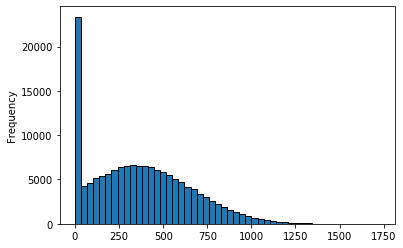

In [34]:
internet['mb_used'].plot(kind='hist', ec='black', bins=50)
plt.show()

Посмотрим на строки с нулевым трафиком:

In [35]:
internet.query('mb_used == 0')

,id,mb_used,session_date,user_id,month
11,100011,0.0,2018-08-28,1000,8
38,100038,0.0,2018-11-27,1000,11
46,100046,0.0,2018-06-30,1000,6
67,100067,0.0,2018-06-16,1000,6
72,100072,0.0,2018-06-15,1000,6
...,...,...,...,...,...
149380,1499141,0.0,2018-12-11,1499,12
149381,1499142,0.0,2018-11-01,1499,11
149383,1499144,0.0,2018-11-27,1499,11
149386,1499147,0.0,2018-10-21,1499,10


Таких строк аж 20000. Это сессии, когда подключение к интернету было включено, но в дальнейшем ни одной операции произведено не было (например, случаи, когда появляется и сразу пропадает связь).

Эти строки необходимо исключить из датафрейма:

In [36]:
internet['mb_used'] = internet['mb_used'].replace(0, np.NaN)
internet = internet.dropna()

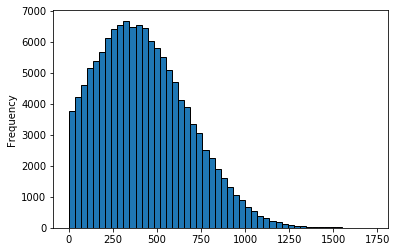

In [118]:
internet['mb_used'].plot(kind='hist', ec='black', bins=50)
plt.show()

Создадим таблицу с гб, для дальнейшего удобства исследования:

In [38]:
internet['gb_used'] = round(internet['mb_used']/1024,2)

In [39]:
internet.head(5)

,id,mb_used,session_date,user_id,month,gb_used
0,10000,112.95,2018-11-25,1000,11,0.11
1,10001,1052.81,2018-09-07,1000,9,1.03
2,10002,1197.26,2018-06-25,1000,6,1.17
3,10003,550.27,2018-08-22,1000,8,0.54
4,10004,302.56,2018-09-24,1000,9,0.30


#### Сообщения

In [40]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [41]:
messages['id'] = messages['id'].astype('int')

Cоздадим доп столбец с месяцем:

In [42]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

#### Пользователи

In [43]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Всё нормально

#### Посчитайте для каждого пользователя: 

- количество сделанных звонков и израсходованных минут разговора по месяцам,
- количество отправленных сообщений по месяцам,
- объем израсходованного интернет-трафика по месяцам, 
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану)

**Количество сделанных звонков и израсходованных минут разговора по месяцам**:

In [44]:
calls['month'] = calls['call_date'].dt.month

In [45]:
calls.head()

,id,call_date,duration,user_id,month
0,10000,2018-07-25,1.0,1000,7
1,10001,2018-08-17,1.0,1000,8
2,10002,2018-06-11,3.0,1000,6
3,10003,2018-09-21,14.0,1000,9
4,10004,2018-12-15,6.0,1000,12


In [46]:
amount_calls = calls.groupby(['user_id', 'month']).agg({'duration':'sum', 'id':'count'}).reset_index().rename(columns={'duration':'month_calls_duration','id':'calls_in_month'})

In [47]:
amount_calls.head()

,user_id,month,month_calls_duration,calls_in_month
0,1000,5,164.0,22
1,1000,6,187.0,43
2,1000,7,346.0,47
3,1000,8,418.0,52
4,1000,9,478.0,58


**Количество отправленных сообщений по месяцам**:

In [48]:
messages['month'] = messages['message_date'].dt.month

In [49]:
messages.head()

,id,message_date,user_id,month
0,10000,2018-06-27,1000,6
1,10001,2018-10-08,1000,10
2,10002,2018-08-04,1000,8
3,10003,2018-06-16,1000,6
4,10004,2018-12-05,1000,12


In [50]:
amount_messages = messages.groupby(['user_id', 'month']).agg({'id':'count'}).reset_index().rename(columns={'id':'sms_in_month'})

In [51]:
amount_messages.head()

,user_id,month,sms_in_month
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


**Объем израсходованного интернет-трафика по месяцам**:

In [52]:
internet['month'] = internet['session_date'].dt.month

In [53]:
amount_internet = internet.groupby(['user_id', 'month']).agg({'mb_used':'sum','gb_used':'sum'}).reset_index().rename(columns={'gb_used':'gb_in_month','mb_used':'mb_in_month'})

In [54]:
amount_internet.head()

,user_id,month,mb_in_month,gb_in_month
0,1000,5,2253.49,2.19
1,1000,6,23233.77,22.68
2,1000,7,14003.64,13.71
3,1000,8,14055.93,13.74
4,1000,9,14568.91,14.25


Соединим три таблицы в одну:

In [55]:
dfs = [amount_calls, amount_messages, amount_internet]
amount_data = reduce(lambda left,right: pd.merge(left,right,on=['user_id', 'month'], how='outer'), dfs)

In [56]:
amount_data.head(2)

,user_id,month,month_calls_duration,calls_in_month,sms_in_month,mb_in_month,gb_in_month
0,1000,5,164.0,22.0,22.0,2253.49,2.19
1,1000,6,187.0,43.0,60.0,23233.77,22.68


In [57]:
amount_data.head(10)

,user_id,month,month_calls_duration,calls_in_month,sms_in_month,mb_in_month,gb_in_month
0,1000,5,164.0,22.0,22.0,2253.49,2.19
1,1000,6,187.0,43.0,60.0,23233.77,22.68
2,1000,7,346.0,47.0,75.0,14003.64,13.71
3,1000,8,418.0,52.0,81.0,14055.93,13.74
4,1000,9,478.0,58.0,57.0,14568.91,14.25
5,1000,10,363.0,57.0,73.0,14702.49,14.36
6,1000,11,344.0,43.0,58.0,14756.47,14.39
7,1000,12,341.0,46.0,70.0,9817.61,9.56
8,1001,11,444.0,59.0,NaN,18429.34,17.98
9,1001,12,430.0,63.0,NaN,14036.66,13.71


**Помесячная выручка с каждого пользователя**:

Для начала соединим данные в одну таблицу:

In [58]:
df = amount_calls.merge(amount_messages, on=['user_id','month'], how='outer')

In [59]:
df.head()

,user_id,month,month_calls_duration,calls_in_month,sms_in_month
0,1000,5,164.0,22.0,22.0
1,1000,6,187.0,43.0,60.0
2,1000,7,346.0,47.0,75.0
3,1000,8,418.0,52.0,81.0
4,1000,9,478.0,58.0,57.0


In [60]:
df = df.merge(amount_internet, on=['user_id','month'], how = 'outer')
df.tail()

,user_id,month,month_calls_duration,calls_in_month,sms_in_month,mb_in_month,gb_in_month
3209,1489,9,NaN,NaN,32.0,17206.30,16.82
3210,1489,10,NaN,NaN,21.0,19559.44,19.11
3211,1489,11,NaN,NaN,20.0,17491.56,17.08
3212,1489,12,NaN,NaN,35.0,17322.51,16.93
3213,1476,4,NaN,NaN,NaN,530.78,0.52


In [61]:
df = df.merge(users, on='user_id', how='left')

In [62]:
df.head()

,user_id,month,month_calls_duration,calls_in_month,sms_in_month,mb_in_month,gb_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,164.0,22.0,22.0,2253.49,2.19,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,187.0,43.0,60.0,23233.77,22.68,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,346.0,47.0,75.0,14003.64,13.71,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,418.0,52.0,81.0,14055.93,13.74,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,478.0,58.0,57.0,14568.91,14.25,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [63]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [64]:
df = df.merge(tariffs, on='tariff', how='left')
df.head()

,user_id,month,month_calls_duration,calls_in_month,sms_in_month,mb_in_month,gb_in_month,age,churn_date,city,...,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,164.0,22.0,22.0,2253.49,2.19,52,NaT,Краснодар,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,187.0,43.0,60.0,23233.77,22.68,52,NaT,Краснодар,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,346.0,47.0,75.0,14003.64,13.71,52,NaT,Краснодар,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,418.0,52.0,81.0,14055.93,13.74,52,NaT,Краснодар,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,478.0,58.0,57.0,14568.91,14.25,52,NaT,Краснодар,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [65]:
df.isna().sum()

user_id                     0
month                       0
month_calls_duration       40
calls_in_month             40
sms_in_month              497
mb_in_month                13
gb_in_month                13
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

Заполним пропуски на нулевые значения, так как скорее всего пропуски появились потому что эти люди не пользуются интернетом, не пишут смс и т.д. :

In [66]:
df['sms_in_month'] = df['sms_in_month'].fillna(0)
df['mb_in_month'] = df['mb_in_month'].fillna(0)
df['gb_in_month'] = df['gb_in_month'].fillna(0)
df['month_calls_duration'] = df['month_calls_duration'].fillna(0)
df['calls_in_month'] = df['calls_in_month'].fillna(0)

In [67]:
df.isna().sum()

user_id                     0
month                       0
month_calls_duration        0
calls_in_month              0
sms_in_month                0
mb_in_month                 0
gb_in_month                 0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

In [68]:
df.duplicated().sum()

0

**Теперь посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам**:

Напишем функцию, округлив mbs вверх, т.к. цена указана за гигабайт:

In [69]:
def tariff_above(row):
    sms = (row['sms_in_month'] - row['messages_included']) * row['rub_per_message']
    mins = (row['month_calls_duration'] - row['minutes_included']) * row['rub_per_minute']
    mbs = ((np.ceil(row['mb_in_month'] - row['mb_per_month_included'])/1024) * row['rub_per_gb'] )
    total = 0
    for i in [sms, mins, mbs]:
        if i > 0:
            total += i
    return total

In [70]:
df['tariff_above'] = df.apply(lambda x: tariff_above(x), axis=1)

In [71]:
df['total_paid'] = df['rub_monthly_fee'] + df['tariff_above']

In [72]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [73]:
df.head(10)

,user_id,month,month_calls_duration,calls_in_month,sms_in_month,mb_in_month,gb_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_above,total_paid
0,1000,5,164.0,22.0,22.0,2253.49,2.19,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.000000,1950.000000
1,1000,6,187.0,43.0,60.0,23233.77,22.68,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.000000,1950.000000
2,1000,7,346.0,47.0,75.0,14003.64,13.71,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.000000,1950.000000
3,1000,8,418.0,52.0,81.0,14055.93,13.74,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.000000,1950.000000
4,1000,9,478.0,58.0,57.0,14568.91,14.25,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.000000,1950.000000
5,1000,10,363.0,57.0,73.0,14702.49,14.36,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.000000,1950.000000
6,1000,11,344.0,43.0,58.0,14756.47,14.39,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.000000,1950.000000
7,1000,12,341.0,46.0,70.0,9817.61,9.56,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.000000,1950.000000
8,1001,11,444.0,59.0,0.0,18429.34,17.98,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,50,15360,500,550,200,3,3,599.609375,1149.609375
9,1001,12,430.0,63.0,0.0,14036.66,13.71,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,50,15360,500,550,200,3,3,0.000000,550.000000


### Вывод

**Звонки**:
- Создали столбец с месяцем
- Нашли количество звонков с нулевой длительностью - 39613
- Округлили все значения в большую сторону (т.к. тариф считается по минутам), а нулевые значения заменили на 1

**Интернет**:
- Создадали столбец с месяцем
- Округлили мб в большую сторону

**Сообщения**:
- Привели столбец id к типу int
- Создали столбец с месяцем

**Пользователи**:
- эту таблицу оставили без изменений

**Посчитали для каждого пользователя по месяцам**:
- Количество сделанных звонков и израсходованных минут разговора
- Количество отправленных сообщений
- Объем израсходованного интернет-трафика 
- Соединили три таблицы в одну и получилась сводная таблица таблица amount_data
- выручку с каждого пользователя:
  - Для этого соединили данные в одну таблицу, получилась таблица df c новыми данными (таблица amount_data + таблицы users, messages, internet, calls)
  - Заполнили пропуски на нулевые значения, так как скорее всего пропуски появились потому что эти люди не пользуются интернетом, не пишут смс и т.д
- Посчитали количество сделанных звонков и израсходованных минут разговора: для этого написали функцию, округлив mbs вверх, т.к. цена указана за гигабайт

## Проанализируйте данные

- Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

**Звонки**:

Тариф "Смарт"

In [74]:
smart_call = df.query('tariff == "smart"')
smart_call_grouped = smart_call.groupby('month')['month_calls_duration'].agg('mean')

Тариф "Ультра"

In [75]:
ultra_call = df.query('tariff == "ultra"')
ultra_call_grouped = ultra_call.groupby('month')['month_calls_duration'].agg('mean')

Количество пользователей в январе меньше, чем, например, в июне. Поэтому для расчетов взяли не сумму по пользователям в каждом месяце, а среднее.

Посчитаем среднее количество минут

In [76]:
smart_call_grouped.mean()

397.37422758161216

In [77]:
ultra_call_grouped.mean()

509.3565514033382

In [78]:
smart_call_grouped.to_frame()

,month_calls_duration
month,
1,209.647059
2,306.310345
3,400.532468
4,377.000000
5,398.404255
6,406.701220
7,419.288557
8,433.191489
9,440.080769


In [79]:
ultra_call_grouped.to_frame()

,month_calls_duration
month,
1,440.888889
2,304.666667
3,503.081081
4,470.072727
5,524.865672
6,492.428571
7,560.296703
8,524.570093
9,553.643478


Посчитаем дисперсию для обоих тарифов:

In [80]:
np.var(smart_call_grouped, ddof=1)

5516.1613240186525

In [81]:
np.var(ultra_call_grouped, ddof=1)

6329.46518897016

Посчитаем стандартное отклонение:

In [82]:
np.std(smart_call_grouped, ddof=1)

74.27086457029198

In [83]:
np.std(ultra_call_grouped, ddof=1)

79.55793605272927

Применим правило трёх сигм и узнаем, в каком промежутке лежат интересующие нас данные:

In [84]:
smart_call_grouped.mean() - 3*np.std(smart_call_grouped, ddof=1)

174.56163387073622

In [85]:
ultra_call_grouped.mean() - 3*np.std(smart_call_grouped, ddof=1)

286.54395769246224

In [86]:
smart_call_grouped.mean() + 3*np.std(smart_call_grouped, ddof=1)

620.186821292488

In [87]:
ultra_call_grouped.mean() + 3*np.std(smart_call_grouped, ddof=1)

732.1691451142142

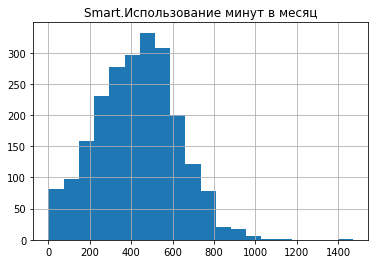

In [88]:
smart_call.hist('month_calls_duration', bins=20)
plt.title('Smart.Использование минут в месяц')
plt.show()

Распределение гистограммы можно назвать нормальным. Большая часть значений лежит в промежутке, который был выявлен ранее. Абсолютное большинство абонентов тарифа smart используют от 300 до 590 минут звонков в месяц.

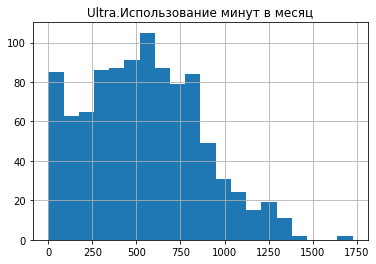

In [89]:
ultra_call.hist('month_calls_duration', bins=20)
plt.title('Ultra.Использование минут в месяц')
plt.show()

Гистограмма скошена вправо. Это говорит о том, что значение медианы меньше среднего, значит, есть ряд высоких значений, которые влияют на среднее, но не влияют на медиану. Видим, что основная масса пользователей использует 400-600 минут в месяц.

**Сообщения**

Тариф "Смарт"

In [90]:
smart_sms = df.query('tariff == "smart"')
smart_sms_grouped = smart_sms.groupby('month')['sms_in_month'].agg('mean')

Тариф "Ультра"

In [91]:
ultra_sms = df.query('tariff == "ultra"')
ultra_sms_grouped = ultra_sms.groupby('month')['sms_in_month'].agg('mean')

Посчитаем среднее количество сообщений в месяц для пользователей обоих тарифов:

In [92]:
smart_sms_grouped.mean()

31.413210661085547

In [93]:
ultra_sms_grouped.mean()

43.71498284147191

Посчитаем дисперсию:

In [94]:
np.var(smart_sms_grouped, ddof=1)

26.0448270922888

In [95]:
np.var(ultra_sms_grouped, ddof=1)

151.79398765605353

Найдем стандартное отклонение:

In [96]:
np.std(smart_sms_grouped, ddof=1)

5.103413278609601

In [97]:
np.std(ultra_sms_grouped, ddof=1)

12.320470269273553

Построим гистограммы:

<function matplotlib.pyplot.show(*args, **kw)>

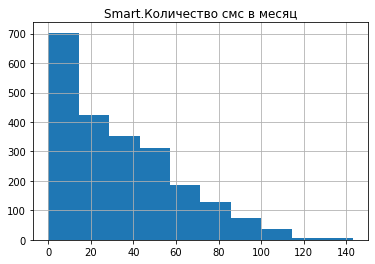

In [98]:
smart_sms.hist('sms_in_month')
plt.title('Smart.Количество смс в месяц')
plt.show

Гистограмма скошена вправо - среднее больше медианы. Получается, хотя большинство пользователей используют сообщения в рамках лимита - 50 - всё же есть те, кто значительно превышает лимит, тем самым принося выручку компании.

<function matplotlib.pyplot.show(*args, **kw)>

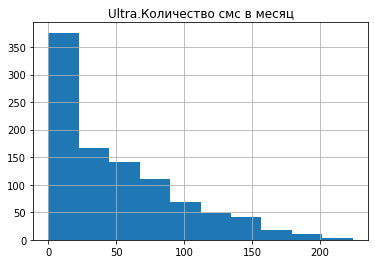

In [99]:
ultra_sms.hist('sms_in_month')
plt.title('Ultra.Количество смс в месяц')
plt.show

Гистограмма здесь также скошена вправо - среднее больше медианы. Кажется, основная масса пользователей ultra использует еще меньше сообщений, чем в smart. Однако, опять-таки, есть и те, кто отправляет 100 и больше сообщений. Но лимита в 1000 сообщений не достигает никто

**Интернет**

Тариф "Смарт":

In [100]:
smart_gb = df.query('tariff == "smart"')
smart_gb_grouped = smart_gb.groupby('month')['gb_in_month'].agg('mean')

Тариф "Ультра":

In [101]:
ultra_gb = df.query('tariff == "ultra"')
ultra_gb_grouped = ultra_gb.groupby('month')['gb_in_month'].agg('mean')

Посчитаем среднее количество использованных мегабайт в месяц для пользователей обоих тарифов:

In [102]:
smart_gb_grouped.mean()

14.705537931308621

In [103]:
ultra_gb_grouped.mean()

17.77842249485461

Дисперсия:

In [104]:
np.var(smart_gb_grouped, ddof=1)

6.802808672665282

In [105]:
np.var(ultra_gb_grouped, ddof=1)

8.511487718324314

Посчитаем среднее отклонение:

In [106]:
np.std(smart_gb_grouped, ddof=1)

2.608219444882904

In [107]:
np.std(ultra_gb_grouped, ddof=1)

2.9174454096562483

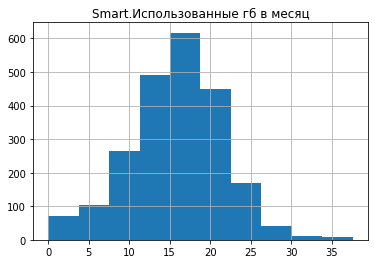

In [108]:
smart_gb.hist('gb_in_month')
plt.title('Smart.Использованные гб в месяц')
plt.show()

Распределение нормальное, видим, что половина пользователей придерживается крайних значений лимита (15 гб), однако вторая половина докупает недостающий трафик. Посмотрим на данные по второму тарифу.

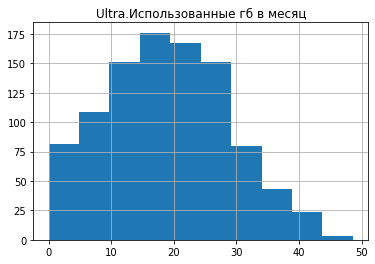

In [109]:
ultra_gb.hist('gb_in_month')
plt.title('Ultra.Использованные гб в месяц')
plt.show()

Из гистограммы очевидно почему основная масса пользователей тарифа ultra выбирает именно его: они используют намного больше трафика, чем пользователи smart. Если на предыдущей гистограмме после значения 17 гб данные уходили вниз, то здесь показатели не снижаются до отметки в 30 гб.

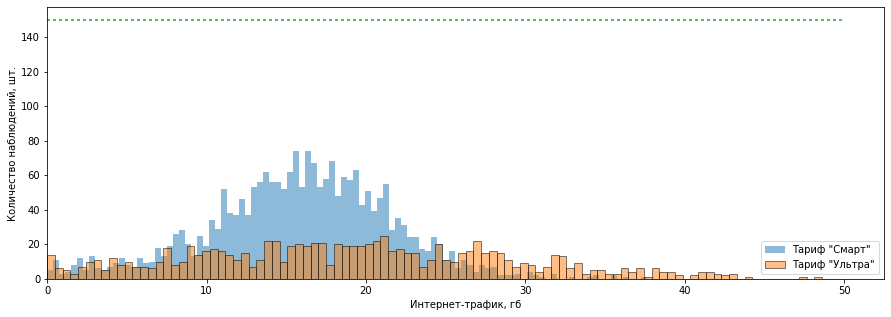

In [110]:
fig = plt.figure(figsize = (15,5))
plt.hist(df.query('tariff == "smart"')['gb_in_month'], bins=100, alpha=0.5, label='Тариф "Смарт"')
plt.hist(df.query('tariff == "ultra"')['gb_in_month'], bins=100, alpha=0.5, label='Тариф "Ультра"', ec="k")
plt.plot([0, 50], [150, 150],dashes=[2, 2])
plt.xlim(left = 0)
plt.legend(loc='best')
plt.xlabel('Интернет-трафик, гб')
plt.ylabel('Количество наблюдений, шт.')
plt.show()

Скачков на нулях почти не наблюдается. По тарифу "Смарт" пиковое значение приходятся на 17 Гб. Пиковое значение по тарифу "Ультра" - на 20-22 Гб. Можно отметить, что в целом графики интернет-траффика имеют нормальное распределение с минимальным количеством выбросов.

### Вывод

- **Звонки**:
  - пользователи smart тарифа используют примерно такое же количество минут в месяц (совсем немного меньше), чем пользователи ultra. Так что можно сделать вывод, что, скорее всего, пользователи ultra выбирают этот тариф не из-за количества минут, а по другим причинам. 
  - распределение на гистограммах неодинаковое и можно заметить, что есть ряд пользователей ultra, которые всё-таки используют большее количество минут по назначению, хотя никто и не достигает лимита в 3000 минут
- **Сообщения**:
  - гистограммы обоих тарифов скошены вправо, значит среднее больше медианы. 
  - большинство пользователей обоих тарифов используют сообщения в рамках лимита. Однако, всё же есть те, кто значительно превышает лимит, тем самым принося выручку компании
- **Интернет**:
  - Пользователи smart и ultra тарифов используют почти одинаковое количество минут звонков и сообщений в месяц. Лимита на звонки и минуты в ultra в среднем не достигает никто. А вот интернетом пользователи ultra пользуются гораздо активнее. Скорее всего, пользователи ultra выбирают этот тариф из-за большего количетсва мб, включенных в пакет услуг. 

## Проверьте гипотезы

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов.

Пороговое значение alpha задайте самостоятельно.

Поясните:
- как вы формулировали нулевую и альтернативную гипотезы;
- какой критерий использовали для проверки гипотез и почему.

**1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается**

Сформулируем нулевую и альтернативную гипотезы. Нулевую гипотезу будем формулировать так, чтобы использовать знак равенства. Альтернативную гипотезу сформулируем оттакливаясь от нулевой гипотезы.

H₀ - средняя выручка пользователей тарифов «Ультра» и «Смарт» равна
H₁ - средняя выручка пользователей тарифов «Ультра» и «Смарт» не равна

In [111]:
smart_paid = df.query('tariff == "smart"')
ultra_paid = df.query('tariff == "ultra"')

Зададим критический уровень статистической значимости:

In [112]:
alpha = .05

In [113]:
results = st.ttest_ind(smart_paid['total_paid'],ultra_paid['total_paid'])
print('p-значение:', results.pvalue)

p-значение: 3.8963755737743836e-182


In [114]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()    
print('Средняя выручка в месяц с пользователя тарифа smart -', smart_paid['total_paid'].mean().round(2))
print('Средняя выручка в месяц с пользователя тарифа ultra -', ultra_paid['total_paid'].mean().round(2))

Отвергаем нулевую гипотезу

Средняя выручка в месяц с пользователя тарифа smart - 1247.47
Средняя выручка в месяц с пользователя тарифа ultra - 2059.88


Отвергаем первую гипотезу. Однако, из данных видно, что между выручкой есть разница. По среднему значению видим, что выручка с пользователей тарифа ultra больше даже несмотря на то, что тариф выбирают в 2 раза реже

**2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов**

Сформулируем нулевую и альтернативную гипотезы:

H₀ - средняя выручка пользователей из Москвы и остальных регионов равна
H₁ - средняя выручка пользователей из Москвы и остальных регионов не равна

In [115]:
Moscow = df.query('city == "Москва"')
not_Moscow = df.query('city != "Москва"')

In [116]:
results = st.ttest_ind(Moscow['total_paid'],not_Moscow['total_paid'])
print('p-значение:', results.pvalue)

p-значение: 0.515868945041714


In [117]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()    
print('Средняя выручка в месяц с пользователя из Москвы', Moscow['total_paid'].mean().round(2))
print('Средняя выручка в месяц с пользователя не из Москвы', not_Moscow['total_paid'].mean().round(2))

Не получилось отвергнуть нулевую гипотезу

Средняя выручка в месяц с пользователя из Москвы 1515.04
Средняя выручка в месяц с пользователя не из Москвы 1492.09


Вторую гипотезу отвергнуть не удалось - выручка с пользователей-москвичей и пользователей из других регионов почти равнозначна.

### Вывод

Проверили 2 гипотезы:

- Средняя выручка пользователей тарифов «Ультра» и «Смарт» равна - отвергли
- Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов - отвергнуть не удалось

## Общий вывод

По результатам статистического анализа доходы от тарифа «Ультра» больше, чем от тарифа «Смарт»: в среднем «Мегалайн» от одного пользователя в месяц получает 2059 рублей и 1247 рублей соответственно.

**Особенности использования тарифов заключаются в следующем**:

- Пользователям тарифа «Смарт» не хватает услуг в рамках тарифного пакета: кроме абонентской платы пользователи в среднем доплачивают еще 438 рублей ежемесячно.
- Пользователи тарифа «Ультра», напротив, не используют тарифный пакет в полном объеме.
- Средние доходы от пользователей в Москве не отличаются от доходов в других населенных пунктах: разница статистически незначима: 1515 руб. в Москве против 1492 руб в других населенных пунктах.

«Мегалайну» надо подумать и выработать промежуточное решение, которое позволяло бы клиенту пользоваться услугами связи без дополнительных заказов (особенно мобильным интернетом). При этом необходимо, чтобы цена являлась промежуточным вариантом между текущими. Учитывая, что средний пользователь тарифа платит в итоге 950-1200 рублей за месяц, а это значит, что эти деньги клиент готов тратить в месяц в качестве абонентской платы, можно было бы предложить тарифы с абонентской платой 1000-1200 р в месяц и назвать их, например, «Смарт +» и «Ультра Мини».  